**CS 5834, Fall 2020: Intro to Urban Computing Project - Association Rules analysis for Gentrification using Cleveland Data Set**




### Imports and Mount File Directories


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys
# modify "customized_path_to_homework", path of folder in drive, where you project is stored
customized_path_to_homework = "/content/drive/My Drive/cs5834/urbcomp_fall2020/project"
file_name = "Cleveland_typology_output.csv"

sys.path.append(customized_path_to_homework)

In [5]:
%cd $customized_path_to_homework/data

/content/drive/My Drive/cs5834/urbcomp_fall2020/project/data


In [6]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import datetime
import warnings


In [7]:

"""
sys.path.insert(0,'../')
%load_ext autoreload
%autoreload 2
import nyctaxi_helpers
warnings.filterwarnings('ignore')
"""

"\nsys.path.insert(0,'../')\n%load_ext autoreload\n%autoreload 2\nimport nyctaxi_helpers\nwarnings.filterwarnings('ignore')\n"

In [8]:
pip install --upgrade mlxtend


     |████████████████████████████████| 1.4MB 4.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [9]:
#ref https://pbpython.com/market-basket-analysis.html


#may need to install mlxtend package - pip install mlxtend in console
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


# **Process Urban Displacement Model Data for Gentrificaiton**


Reference: https://www.urbandisplacement.org/open-source-project

Based on the work https://ww2.arb.ca.gov/sites/default/files/classic//research/apr/past/13-310.pdf?_ga=2.269282425.968981409.1605209194-851335111.1605209194

**Developing a New
Methodology for Analyzing
Potential Displacement**

University of California, Berkeley

Principal Investigator:
Karen Chapple 

https://ww3.arb.ca.gov/research/single-project.php?row_id=65188

**Obtain the Data**

Data can be found at https://github.com/urban-displacement/displacement-typologies/blob/main/data/outputs/typologies/LosAngeles_typology_output.csv

In [10]:
#!wget -nc https://raw.githubusercontent.com/urban-displacement/displacement-typologies/main/data/outputs/typologies/LosAngeles_typology_output.csv

In [11]:
## Process Data - if data file already processed then can start at Associaton Rules section
# get the Data File

df = pd.read_csv("https://raw.githubusercontent.com/urban-displacement/displacement-typologies/main/data/outputs/typologies/{}".format(file_name), index_col=0)
#df = pd.read_csv("{}/data/{}".format(customized_path_to_homework, file_name), index_col=0)

# sneak peak in the data
df.head(10)


,pop_18,white_18,hh_18,hinc_18,mhval_18,mhval_18_se,mrent_18,mrent_18_se,total_25_18,total_25_col_bd_18,total_25_col_md_18,total_25_col_pd_18,total_25_col_phd_18,tot_units_built_18,units_40_49_built_18,units_39_early_built_18,ohu_18,rhu_18,mmhcosts_18,iinc_18,mov_wc_w_income_18,mov_wc_9000_18,mov_wc_15000_18,mov_wc_25000_18,mov_wc_35000_18,mov_wc_50000_18,mov_wc_65000_18,mov_wc_75000_18,mov_wc_76000_more_18,mov_oc_w_income_18,mov_oc_9000_18,mov_oc_15000_18,mov_oc_25000_18,state_x,county_x,tract_x,mov_oc_35000_18,mov_oc_50000_18,mov_oc_65000_18,mov_oc_75000_18,...,aboverm_pctch_real_mrent_12_18,aboverm_pctch_real_mhval_90_00,aboverm_pctch_real_mrent_90_00,lostli_00,lostli_18,aboverm_pctch_real_hinc_90_00,aboverm_pctch_real_hinc_00_18,aboverm_ch_per_col_90_00,aboverm_ch_per_col_00_18,aboverm_per_units_pre50_18,GEOID,rail,presence_ph_LIHTC,vul_gent_90,vul_gent_00,vul_gent_18,hotmarket_00,hotmarket_18,gent_90_00,gent_90_00_urban,gent_00_18,gent_00_18_urban,dp_PChRent,dp_RentGap,tr_rent_gap,rm_rent_gap,dense,SAE,AdvG,ARE,BE,SMMI,ARG,EOG,OD,OD_loss,LISD,double_counted,typology,typ_cat
0,2821.0,2780.0,1034.0,69125.0,171700.0,20448.0,571.0,365.0,1951.0,317.0,156.0,10.0,28.0,1050.0,28.0,171.0,932.0,102.0,744.0,34390.0,121.0,14.0,0.0,26.0,13.0,17.0,0.0,46.0,5.0,49.0,7.0,2.0,7.0,39,55,312000,5.0,11.0,4.0,0.0,...,0,1,0,0,1,1,1,0,1,0,39055312000,0,False,0,0,0,1.0,1.0,0,0,0,0,0,0,-571.000000,20.207763,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0,1.0,6.0,['SMMI']
1,6611.0,6428.0,2540.0,81857.0,217400.0,15366.0,1146.0,47.0,4764.0,1461.0,316.0,27.0,153.0,2612.0,101.0,88.0,2413.0,127.0,1245.0,36310.0,47.0,25.0,9.0,13.0,0.0,0.0,0.0,0.0,0.0,147.0,20.0,0.0,17.0,39,55,310600,16.0,25.0,43.0,26.0,...,1,0,1,0,0,1,0,0,1,0,39055310600,0,False,0,0,0,1.0,1.0,0,0,0,0,0,0,-117.121388,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
2,3664.0,3618.0,1059.0,56625.0,179600.0,14576.0,713.0,64.0,1927.0,192.0,59.0,9.0,0.0,1149.0,60.0,231.0,876.0,183.0,870.0,26689.0,83.0,0.0,13.0,17.0,26.0,27.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,39,55,311000,5.0,2.0,0.0,0.0,...,0,1,1,0,0,1,0,0,0,0,39055311000,0,False,0,0,0,1.0,1.0,0,0,0,0,1,1,442.000000,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
3,4438.0,4249.0,1738.0,56402.0,171800.0,7108.0,896.0,52.0,2958.0,474.0,153.0,40.0,6.0,1794.0,118.0,406.0,1237.0,501.0,955.0,26750.0,320.0,64.0,12.0,49.0,41.0,86.0,37.0,23.0,8.0,158.0,46.0,15.0,34.0,39,55,311300,11.0,4.0,14.0,4.0,...,1,1,0,0,0,1,0,0,0,1,39055311300,0,False,0,0,0,1.0,1.0,0,0,0,0,1,0,-132.172317,20.207763,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0,1.0,6.0,['SMMI']
4,3706.0,3612.0,1621.0,71326.0,233100.0,22815.0,868.0,198.0,2800.0,596.0,234.0,74.0,31.0,1750.0,78.0,117.0,1501.0,120.0,1200.0,36851.0,27.0,0.0,0.0,8.0,8.0,8.0,0.0,0.0,3.0,51.0,10.0,12.0,0.0,39,55,310700,18.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,39055310700,0,False,0,0,0,0.0,1.0,0,0,0,0,1,1,320.849425,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
5,5355.0,5279.0,2199.0,106712.0,283100.0,35531.0,1415.0,333.0,4084.0,1353.0,519.0,192.0,133.0,2347.0,1.0,323.0,2018.0,181.0,1672.0,45417.0,37.0,1.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,113.0,0.0,0.0,10.0,39,55,311500,0.0,0.0,47.0,0.0,...,1,0,0,0,1,0,1,0,1,0,39055311500,0,False,0,0,0,0.0,1.0,0,0,0,0,1,0,-275.502638,20.207763,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,9.0,['SAE']
6,4355.0,3790.0,1807.0,109671.0,347700.0,87799.0,1199.0,120.0,3077.0,1408.0,412.0,270.0,44.0,1857.0,81.0,284.0,1491.0,316.0,1546.0,49500.0,88.0,0.0,0.0,8.0,8.0,15.0,0.0,32.0,25.0,126.0,10.0,0.0,0.0,39,55,311700,9.0,10.0,36.0,0.0,...,1,1,1,0,0,1,1,1,1,0,39055311700,0,True,0,0,0,1.0,1.0,0,0,0,0,0,0,-55.991151,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
7,4169.0,4104.0,1036.0,64167.0,188700.0,11754.0,633.0,301.0,1978.0,163.0,75.0,13.0,0.0,1080.0,78.0,196.0,916.0,120.0,947.0,27009.0,54.0,7.0,0.0,0.0,26.0,12.0,9.0,0.0,0.0,78.0,8.0,0.0,9.0,39,55,312100,18.0,26.0,9.0,0.0,...,0,1,1,0,1,1,1,1,0,0,39055312100,0,False,0,0,0,1.0,1.0,0,0,0,0,0,0,-633.000000,20.207763

In [12]:
df.columns

Index(['pop_18', 'white_18', 'hh_18', 'hinc_18', 'mhval_18', 'mhval_18_se',
       'mrent_18', 'mrent_18_se', 'total_25_18', 'total_25_col_bd_18',
       ...
       'BE', 'SMMI', 'ARG', 'EOG', 'OD', 'OD_loss', 'LISD', 'double_counted',
       'typology', 'typ_cat'],
      dtype='object', length=305)

In [13]:
"""
# create a working copy of the data to process
df2 = df.copy()

#removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00',
df2 = df2[[ 'inc80_18',
 'inc120_18',
 'inc80_00',
 'inc120_00',
 'inc80_90',
 'low_80120_18',
 'mod_80120_18',
 'high_80120_18',
 'low_pdmt_medhhinc_18',
 'high_pdmt_medhhinc_18',
 'mod_pdmt_medhhinc_18',
 'mix_low_medhhinc_18',
 'mix_mod_medhhinc_18',
 'mix_high_medhhinc_18',

 'low_80120_00',
 'mod_80120_00',
 'high_80120_00',
 'low_pdmt_medhhinc_00',
 'high_pdmt_medhhinc_00',
 'mod_pdmt_medhhinc_00',
 'mix_low_medhhinc_00',
 'mix_mod_medhhinc_00',
 'mix_high_medhhinc_00',

 'per_all_li_90',
 'per_all_li_00',
 'per_all_li_18',
 'per_nonwhite_90',
 'per_nonwhite_00',
 'per_nonwhite_18',
 'per_rent_90',
 'per_rent_00',
 'per_rent_18',
 'per_col_90',
 'per_col_00',
 'per_col_18',
 'per_units_pre50_18',
 'per_limove_18',
 'per_limove_12',
 'lmh_flag_category',
 'pctch_real_mhval_00_18',
 'pctch_real_mrent_12_18',
 'rent_decrease',
 'rent_marginal',
 'rent_increase',
 'rent_rapid_increase',
 'house_decrease',
 'house_marginal',
 'house_increase',
 'house_rapid_increase',
 'tot_decrease',
 'tot_marginal',
 'tot_increase',
 'tot_rapid_increase',
 'change_flag_category',
 'per_ch_zillow_12_18',
 'ab_50pct_ch',
 'ab_90percentile_ch',
 'rent_50pct_ch',
 'rent_90percentile_ch',
 'hv_abrm_ch',
 'rent_abrm_ch',
 'pctch_real_mhval_90_00',
 'pctch_real_mrent_90_00',
 'pctch_real_hinc_90_00',
 'pctch_real_mrent_00_18',
 'pctch_real_hinc_00_18',
 'ch_per_col_90_00',
 'ch_per_col_00_18',
 'ch_per_limove_12_18',
 'aboverm_per_all_li_90',
 'aboverm_per_all_li_00',
 'aboverm_per_all_li_18',
 'aboverm_per_nonwhite_18',
 'aboverm_per_nonwhite_90',
 'aboverm_per_nonwhite_00',
 'aboverm_per_rent_90',
 'aboverm_per_rent_00',
 'aboverm_per_rent_18',
 'aboverm_per_col_90',
 'aboverm_per_col_00',
 'aboverm_per_col_18',
 'aboverm_real_mrent_90',
 'aboverm_real_mrent_00',
 'aboverm_real_mrent_12',
 'aboverm_real_mrent_18',
 'aboverm_real_mhval_90',
 'aboverm_real_mhval_00',
 'aboverm_real_mhval_18',
 'aboverm_pctch_real_mhval_00_18',
 'aboverm_pctch_real_mrent_00_18',
 'aboverm_pctch_real_mrent_12_18',
 'aboverm_pctch_real_mhval_90_00',
 'aboverm_pctch_real_mrent_90_00',
 'lostli_00',
 'lostli_18',
 'aboverm_pctch_real_hinc_90_00',
 'aboverm_pctch_real_hinc_00_18',
 'aboverm_ch_per_col_90_00',
 'aboverm_ch_per_col_00_18',
 'aboverm_per_units_pre50_18',
 'GEOID',
 'rail',
 'presence_ph_LIHTC',
 'hotmarket_00',
 'hotmarket_18',
 'dp_PChRent',
 'dp_RentGap',
 'dense',
 'typology']]


# drop rows which dont have a gentrification category
df2.dropna(subset=['typology'], inplace=True)
df2 = df2.set_index('GEOID')

#fill the nas
df2.fillna(0.0, inplace=True)


df2.head(10)
"""

"\n# create a working copy of the data to process\ndf2 = df.copy()\n\n#removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00',\ndf2 = df2[[ 'inc80_18',\n 'inc120_18',\n 'inc80_00',\n 'inc120_00',\n 'inc80_90',\n 'low_80120_18',\n 'mod_80120_18',\n 'high_80120_18',\n 'low_pdmt_medhhinc_18',\n 'high_pdmt_medhhinc_18',\n 'mod_pdmt_medhhinc_18',\n 'mix_low_medhhinc_18',\n 'mix_mod_medhhinc_18',\n 'mix_high_medhhinc_18',\n\n 'low_80120_00',\n 'mod_80120_00',\n 'high_80120_00',\n 'low_pdmt_medhhinc_00',\n 'high_pdmt_medhhinc_00',\n 'mod_pdmt_medhhinc_00',\n 'mix_low_medhhinc_00',\n 'mix_mod_medhhinc_00',\n 'mix_high_medhhinc_00',\n\n 'per_all_li_90',\n 'per_all_li_00',\n 'per_all_li_18',\n 'per_nonwhite_90',\n 'per_nonwhite_00',\n 'per_nonwhite_18',\n 'per_rent_90',\n 'per_rent_00',\n 'per_rent_18',\n 'per_col_90',\n 'per_col_00',\n 'per_col_18',\n 'per_units_pre50_18',\n 'per_limove_18',\n 'per_limove_12',\n 'lmh_flag_category',\n 'pctch_real_mhval_00_18',\n 'pctch_real_mrent_1

In [14]:
# create a working copy of the data to process
df2 = df.copy()

"""
removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00', 
'inc80_18',
 'inc120_18',
 'inc80_00',
 'inc120_00',
 'inc80_90',
  'per_col_90',
 'per_col_00',
 'per_col_18',
  'tot_decrease',
 'tot_marginal',
 'tot_increase',
 'tot_rapid_increase',
  'pctch_real_mhval_90_00',
 'pctch_real_mrent_90_00',
 'pctch_real_mrent_00_18',
 'per_units_pre50_18',
  
"""

df2.head(10)
df2 = df2[[ 

 'low_80120_18',
 'mod_80120_18',
 'high_80120_18',
 'low_pdmt_medhhinc_18',
 'high_pdmt_medhhinc_18',
 'mod_pdmt_medhhinc_18',
 'mix_low_medhhinc_18',
 'mix_mod_medhhinc_18',
 'mix_high_medhhinc_18',

 'low_80120_00',
 'mod_80120_00',
 'high_80120_00',
 'low_pdmt_medhhinc_00',
 'high_pdmt_medhhinc_00',
 'mod_pdmt_medhhinc_00',
 'mix_low_medhhinc_00',
 'mix_mod_medhhinc_00',
 'mix_high_medhhinc_00',

 'per_all_li_90',
 'per_all_li_00',
 'per_all_li_18',
 'per_nonwhite_90',
 'per_nonwhite_00',
 'per_nonwhite_18',
 'per_rent_90',
 'per_rent_00',
 'per_rent_18',

 
 'per_limove_18',
 'per_limove_12',
 'lmh_flag_category',
 'pctch_real_mhval_00_18',
 'pctch_real_mrent_12_18',
 'rent_decrease',
 'rent_marginal',
 'rent_increase',
 'rent_rapid_increase',
 'house_decrease',
 'house_marginal',
 'house_increase',
 'house_rapid_increase',

 'change_flag_category',
 'per_ch_zillow_12_18',
 'ab_50pct_ch',
 'ab_90percentile_ch',
 'rent_50pct_ch',
 'rent_90percentile_ch',
 'hv_abrm_ch',
 'rent_abrm_ch',

 'pctch_real_hinc_90_00',
 
 'pctch_real_hinc_00_18',
 'ch_per_col_90_00',
 'ch_per_col_00_18',
 'ch_per_limove_12_18',
 'aboverm_per_all_li_90',
 'aboverm_per_all_li_00',
 'aboverm_per_all_li_18',
 'aboverm_per_nonwhite_18',
 'aboverm_per_nonwhite_90',
 'aboverm_per_nonwhite_00',
 'aboverm_per_rent_90',
 'aboverm_per_rent_00',
 'aboverm_per_rent_18',
 'aboverm_per_col_90',
 'aboverm_per_col_00',
 'aboverm_per_col_18',
 'aboverm_real_mrent_90',
 'aboverm_real_mrent_00',
 'aboverm_real_mrent_12',
 'aboverm_real_mrent_18',
 'aboverm_real_mhval_90',
 'aboverm_real_mhval_00',
 'aboverm_real_mhval_18',
 'aboverm_pctch_real_mhval_00_18',
 'aboverm_pctch_real_mrent_00_18',
 'aboverm_pctch_real_mrent_12_18',
 'aboverm_pctch_real_mhval_90_00',
 'aboverm_pctch_real_mrent_90_00',
 'lostli_00',
 'lostli_18',
 'aboverm_pctch_real_hinc_90_00',
 'aboverm_pctch_real_hinc_00_18',
 'aboverm_ch_per_col_90_00',
 'aboverm_ch_per_col_00_18',
 'aboverm_per_units_pre50_18',
 'GEOID',
 'rail',
 'presence_ph_LIHTC',
 'hotmarket_00',
 'hotmarket_18',
 'dp_PChRent',
 'dp_RentGap',
 'dense',
 'typology']]

# drop rows which dont have a gentrification category
df2.dropna(subset=['typology'], inplace=True)
df2 = df2.set_index('GEOID')

#fill the nas
df2.fillna(0.0, inplace=True)


df2.head(10)

,low_80120_18,mod_80120_18,high_80120_18,low_pdmt_medhhinc_18,high_pdmt_medhhinc_18,mod_pdmt_medhhinc_18,mix_low_medhhinc_18,mix_mod_medhhinc_18,mix_high_medhhinc_18,low_80120_00,mod_80120_00,high_80120_00,low_pdmt_medhhinc_00,high_pdmt_medhhinc_00,mod_pdmt_medhhinc_00,mix_low_medhhinc_00,mix_mod_medhhinc_00,mix_high_medhhinc_00,per_all_li_90,per_all_li_00,per_all_li_18,per_nonwhite_90,per_nonwhite_00,per_nonwhite_18,per_rent_90,per_rent_00,per_rent_18,per_limove_18,per_limove_12,lmh_flag_category,pctch_real_mhval_00_18,pctch_real_mrent_12_18,rent_decrease,rent_marginal,rent_increase,rent_rapid_increase,house_decrease,house_marginal,house_increase,house_rapid_increase,...,ch_per_limove_12_18,aboverm_per_all_li_90,aboverm_per_all_li_00,aboverm_per_all_li_18,aboverm_per_nonwhite_18,aboverm_per_nonwhite_90,aboverm_per_nonwhite_00,aboverm_per_rent_90,aboverm_per_rent_00,aboverm_per_rent_18,aboverm_per_col_90,aboverm_per_col_00,aboverm_per_col_18,aboverm_real_mrent_90,aboverm_real_mrent_00,aboverm_real_mrent_12,aboverm_real_mrent_18,aboverm_real_mhval_90,aboverm_real_mhval_00,aboverm_real_mhval_18,aboverm_pctch_real_mhval_00_18,aboverm_pctch_real_mrent_00_18,aboverm_pctch_real_mrent_12_18,aboverm_pctch_real_mhval_90_00,aboverm_pctch_real_mrent_90_00,lostli_00,lostli_18,aboverm_pctch_real_hinc_90_00,aboverm_pctch_real_hinc_00_18,aboverm_ch_per_col_90_00,aboverm_ch_per_col_00_18,aboverm_per_units_pre50_18,rail,presence_ph_LIHTC,hotmarket_00,hotmarket_18,dp_PChRent,dp_RentGap,dense,typology
GEOID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39055312000,0.255773,0.187286,0.556941,0.0,1.0,0.0,0.0,0.0,0.0,0.328722,0.178522,0.492756,0.0,0.0,0.0,0.0,1.0,0.0,0.297418,0.328722,0.255773,0.008504,0.022205,0.014534,0.224215,0.126292,0.098646,0.287444,0.392191,aff_mix_low,-0.104308,-0.419397,1,0,0,0,1,0,0,0,...,-0.104746,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,0,0,1,0,0,1,1,1,0,1,0,0,False,1.0,1.0,0,0,0,6.0
39055310600,0.246643,0.134087,0.619270,0.0,1.0,0.0,0.0,0.0,0.0,0.198238,0.149305,0.652457,0.0,1.0,0.0,0.0,0.0,0.0,0.146731,0.198238,0.246643,0.008015,0.026169,0.027681,0.076120,0.060644,0.050000,0.410168,0.672998,aff_mix_mod,-0.220562,0.032432,0,1,0,0,1,0,0,0,...,-0.262830,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,False,1.0,1.0,0,0,0,7.0
39055311000,0.335374,0.252017,0.412609,0.0,0.0,0.0,0.0,1.0,0.0,0.290566,0.216015,0.493419,0.0,0.0,0.0,0.0,1.0,0.0,0.296549,0.290566,0.335374,0.015536,0.017013,0.012555,0.152227,0.113078,0.172805,0.360513,0.514551,aff_mix_mod,-0.187216,-0.247843,1,0,0,0,1,0,0,0,...,-0.154039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,False,1.0,1.0,1,1,0,7.0
39055311300,0.312035,0.263590,0.424374,0.0,0.0,0.0,0.0,1.0,0.0,0.320965,0.212313,0.466721,0.0,0.0,0.0,0.0,1.0,0.0,0.298236,0.320965,0.312035,0.007172,0.026842,0.042587,0.247388,0.240972,0.288262,0.425266,0.480145,aff_mix_mod,-0.187644,0.161449,0,0,0,1,1,0,0,0,...,-0.054879,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,False,1.0,1.0,1,0,0,6.0
39055310700,0.285819,0.150907,0.563275,0.0,1.0,0.0,0.0,0.0,0.0,0.197260,0.162249,0.640491,0.0,1.0,0.0,0.0,0.0,0.0,0.168657,0.197260,0.285819,0.026272,0.022922,0.025364,0.045202,0.071108,0.074028,0.298823,0.406073,aff_mix_mod,-0.160127,-0.204494,1,0,0,0,1,0,0,0,...,-0.107251,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,False,0.0,1.0,1,1,0,7.0
39055311500,0.144824,0.117032,0.738144,0.0,1.0,0.0,0.0,0.0,0.0,0.157302,0.140659,0.702040,0.0,1.0,0.0,0.0,0.0,0.0,0.119155,0.157302,0.144824,0.020489,0.036405,0.014192,0.060514,0.059267,0.082310,0.159718,0.392379,aff_mix_high,-0.213902,0.877430,0,0,0,1,1,0,0,0,...,-0.232662,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,False,0.0,1.0,1,0,0,9.0
39055311700,0.183136,0.113600,0.703264,0.0,1.0,0.0,0.0,0.0,0.0,0.216274,0.115737,0.667989,0.0,1.0,0.0,0.0,0.0,0.0,0.173162,0.216274,0.183136,0.138111,0.150402,0.129736,0.129401,0.105179,0.174875,0.145535,0.312102,aff_mix_mod,-0.0

Correlation Heatmap

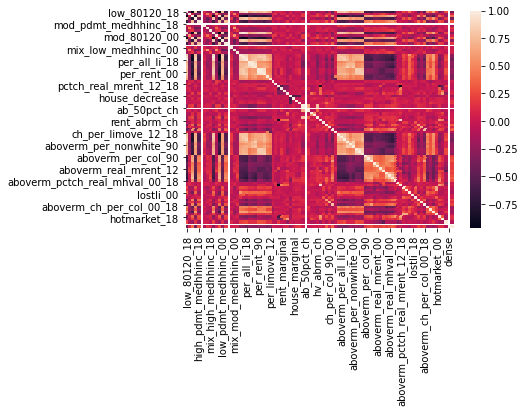

In [15]:
import seaborn as sns

sns.heatmap(df2.corr())

In [16]:
#df2.corr()['inc80_18'] > 0.9


In [17]:
#ref: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Create correlation matrix
corr_matrix = df2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [18]:
to_drop

['high_80120_18',
 'high_80120_00',
 'per_all_li_00',
 'per_all_li_18',
 'per_nonwhite_00',
 'per_rent_00',
 'aboverm_pctch_real_mrent_12_18']

In [19]:
# Drop features 
#df2.drop(df[to_drop], axis=1)

### Convert select continous variables to categorical and one hot encode 

In [20]:
# convert already dummy variables from float to int
dummy_var_list = ['hotmarket_00', 'hotmarket_18', 'low_pdmt_medhhinc_00', 'high_pdmt_medhhinc_00', 'mod_pdmt_medhhinc_00',
                  'mix_low_medhhinc_00', 'mix_mod_medhhinc_00',  'mix_high_medhhinc_00', 'low_pdmt_medhhinc_18', 'high_pdmt_medhhinc_18',
                  'mod_pdmt_medhhinc_18', 'mix_low_medhhinc_18', 'mix_mod_medhhinc_18', 'mix_high_medhhinc_18', 'presence_ph_LIHTC',
                  'typology']
for dummycol in dummy_var_list:
  df2.loc[:,(dummycol)] = df2[dummycol].astype(int, copy=False)

In [21]:
# use float variables to represent each categorical variable by dividing into quartiles
def convert_percents_to_dummy_vars(X):

    columns = X.columns

    bin_labels_4 = ['VL', 'L', 'H',  'VH']


    for i in range(0, len(columns)):
        if X[columns[i]].dtype=='float64':
          print("Processing: " + columns[i])

          X[columns[i]] = X[columns[i]].fillna(0)
          cat_label = "{}_cat".format(columns[i])
          dummy_label = "{}_dummy".format(columns[i])
          X[cat_label] = pd.qcut(X[columns[i]], 
                                 4,
                              precision=5,
                              duplicates = 'drop',
                              labels=bin_labels_4)
          X = pd.get_dummies(X, columns=[cat_label], prefix=[dummy_label])
          X = X.drop([columns[i]], axis=1)

    return X

In [22]:
# check if categorical then convert to dummy using label and onehot encoding
def convert_categorical_to_dummy_vars(X):

    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder    

    columns = X.columns
    indices = X.index
    new_columns = []
    encoded_x = None

    for i in range(0, len(columns)):
        if X[columns[i]].dtype=='O':
          print("Processing: " + columns[i])


          label_encoder = LabelEncoder()
          le = label_encoder.fit(X[columns[i]].apply(str))
          for class_ in le.classes_:
              new_columns.append("{}_{}".format(columns[i],class_))
              
          feature = le.transform(X[columns[i]].apply(str))
          feature = feature.reshape(X.shape[0], 1)
          onehot_encoder = OneHotEncoder(sparse=False)
          onehot_encoder.fit(feature)
          feature = onehot_encoder.transform(feature)
          if encoded_x is None:
              encoded_x = feature
          else:
              encoded_x = np.concatenate((encoded_x, feature), axis=1)
          X = X.drop(columns[i], axis=1)
    new_columns.extend(X.columns)

    X = pd.DataFrame(np.concatenate((encoded_x,X),axis=1),index=indices,columns=new_columns)
    
    return X


### Convert Percentage (floats) to Quartiles and Dummy Variables 

In [23]:
# process and save data all converted to one hot encoding
df2 = convert_percents_to_dummy_vars(df2)





Processing: low_80120_18
Processing: mod_80120_18
Processing: high_80120_18
Processing: low_80120_00
Processing: mod_80120_00
Processing: high_80120_00
Processing: per_all_li_90
Processing: per_all_li_00
Processing: per_all_li_18
Processing: per_nonwhite_90
Processing: per_nonwhite_00
Processing: per_nonwhite_18
Processing: per_rent_90
Processing: per_rent_00
Processing: per_rent_18
Processing: per_limove_18
Processing: per_limove_12
Processing: pctch_real_mhval_00_18
Processing: pctch_real_mrent_12_18
Processing: per_ch_zillow_12_18
Processing: pctch_real_hinc_90_00
Processing: pctch_real_hinc_00_18
Processing: ch_per_col_90_00
Processing: ch_per_col_00_18
Processing: ch_per_limove_12_18


In [24]:
df2 = convert_categorical_to_dummy_vars(df2)


Processing: lmh_flag_category
Processing: change_flag_category


iii. Save the dataset as a CSV file. The first line of the CSV file should be the attribute
names as described in the previous question. 

In [25]:
df2.to_csv("{}/data/processed_{}".format(customized_path_to_homework, file_name))

# **Association Rule Calculations**


In [26]:
#load already processed data 
df3 = pd.read_csv("{}/data/processed_{}".format(customized_path_to_homework, file_name), index_col=0)
df3 = df3.astype(int)


In [27]:
confidence_cut = 0.85
lift_cut = 1.0
conviction_cut = 0.9
support_cut = 0.7

# Associaton Rules Analysis - Gentrified

In [28]:
gent_class = 'gent'
df_class = df3[df3['typology'].isin(['4', '5','99'])].drop(['typology'], axis=1)


In [29]:
df_class = df_class.astype(bool)


In [30]:
frequent_itemsets = fpgrowth(df_class, min_support= support_cut, use_colnames=True, verbose=1)
#%timeit  frequent_itemsets_gent = apriori(df_gent, min_support=0.07, use_colnames=True, verbose=1, low_memory=False)

32 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (lmh_flag_category_aff_mix_mod)
1 itemset(s) from tree conditioned on items (hotmarket_18)
3 itemset(s) from tree conditioned on items (hotmarket_00)
7 itemset(s) from tree conditioned on items (aboverm_per_rent_90)
15 itemset(s) from tree conditioned on items (aboverm_pctch_real_mhval_90_00)
31 itemset(s) from tree conditioned on items (rent_abrm_ch)
6 itemset(s) from tree conditioned on items (aboverm_per_all_li_90)
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, aboverm_per_rent_90)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, hotmarket_00)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, hotmarket_18)
7 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, lmh_flag_category_aff_mix_mod)
15 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, rent_abrm_ch)
31 itemset(s) from tree conditioned on items (above

In [31]:
frequent_itemsets.dtypes

support     float64
itemsets     object
dtype: object

In [32]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)



### Gentrification Calculate Rule Metrics

In [33]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [34]:
frequent_itemsets.head(10)

,support,itemsets
0,1.000000,(lmh_flag_category_aff_mix_mod)
1,1.000000,(hotmarket_18)
2,1.000000,(hotmarket_00)
3,1.000000,(aboverm_per_rent_90)
4,0.909091,(aboverm_pctch_real_mhval_90_00)
5,0.909091,(rent_abrm_ch)
6,0.909091,(aboverm_per_all_li_90)
7,0.909091,(aboverm_pctch_real_mrent_12_18)
8,0.818182,(lostli_18)
9,0.818182,(aboverm_real_mrent_18)


In [35]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(lmh_flag_category_aff_mix_mod),(hotmarket_18),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(hotmarket_18),(lmh_flag_category_aff_mix_mod),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(hotmarket_18),(hotmarket_00),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(hotmarket_00),(hotmarket_18),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(lmh_flag_category_aff_mix_mod),(hotmarket_00),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(hotmarket_00),(lmh_flag_category_aff_mix_mod),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,"(lmh_flag_category_aff_mix_mod, hotmarket_18)",(hotmarket_00),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,"(lmh_flag_category_aff_mix_mod, hotmarket_00)",(hotmarket_18),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,"(hotmarket_18, hotmarket_00)",(lmh_flag_category_aff_mix_mod),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(lmh_flag_category_aff_mix_mod),"(hotmarket_18, hotmarket_00)",1.0,1.0,1.0,1.0,1.0,0.0,inf


In [36]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

**Rules with high Lift and Confidence**

In [37]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [38]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(lmh_flag_category_aff_mix_mod),(hotmarket_18),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf
1,(hotmarket_18),(lmh_flag_category_aff_mix_mod),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf
2,(hotmarket_18),(hotmarket_00),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf
3,(hotmarket_00),(hotmarket_18),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf
4,(lmh_flag_category_aff_mix_mod),(hotmarket_00),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
2471793,(aboverm_per_units_pre50_18),"(aboverm_per_nonwhite_90, hotmarket_00, presen...",0.727273,0.727273,0.727273,1.000000,1.375000,0.198347,inf
2471794,(presence_ph_LIHTC),"(aboverm_per_units_pre50_18, aboverm_per_nonwh...",0.818182,0.727273,0.727273,0.888889,1.222222,0.132231,2.454545
2471795,(aboverm_per_all_li_00),"(aboverm_per_units_pre50_18, aboverm_per_nonwh...",0.818182,0.727273,0.727273,0.888889,1.222222,0.132231,2.454545
2471796,(aboverm_per_rent_18),"(aboverm_per_units_pre50_18, aboverm_per_nonwh...",0.818182,0.727273,0.727273,0.888889,1.222222,0.132231,2.454545


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Confidence ranges from 0 to 1. Confidence is an estimate of Pr(C | A), the
probability of observing C given A. After obtaining a rule set, one can immediatly
use confidence as a basis for classifying one new case x. Of all the rules that
apply to x (i.e., the rules whose antecedent is true in x), we choose the one
with highest confidence. This loosely follows the optimal Bayes classifier

In [39]:
rules.nlargest(10, 'confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(lmh_flag_category_aff_mix_mod),(hotmarket_18),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(hotmarket_18),(lmh_flag_category_aff_mix_mod),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(hotmarket_18),(hotmarket_00),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(hotmarket_00),(hotmarket_18),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(lmh_flag_category_aff_mix_mod),(hotmarket_00),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(hotmarket_00),(lmh_flag_category_aff_mix_mod),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,"(lmh_flag_category_aff_mix_mod, hotmarket_18)",(hotmarket_00),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,"(lmh_flag_category_aff_mix_mod, hotmarket_00)",(hotmarket_18),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,"(hotmarket_18, hotmarket_00)",(lmh_flag_category_aff_mix_mod),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(lmh_flag_category_aff_mix_mod),"(hotmarket_18, hotmarket_00)",1.0,1.0,1.0,1.0,1.0,0.0,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Conviction is another measure proposed in [4] to tackle some of the weaknesses of confidence and lift. Unlike lift, conviction is sensitive to rule direction
(conv(A → C) 6= conv(C → A)). Conviction is somewhat inspired in the logical
definition of implication and attempts to measure the degree of implication of
a rule. Conviction is infinite for logical implications (confidence 1), and is 1 if
A and C are independent

In [40]:
rules.nlargest(10, 'conviction')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(lmh_flag_category_aff_mix_mod),(hotmarket_18),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(hotmarket_18),(lmh_flag_category_aff_mix_mod),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(hotmarket_18),(hotmarket_00),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(hotmarket_00),(hotmarket_18),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(lmh_flag_category_aff_mix_mod),(hotmarket_00),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(hotmarket_00),(lmh_flag_category_aff_mix_mod),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,"(lmh_flag_category_aff_mix_mod, hotmarket_18)",(hotmarket_00),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,"(lmh_flag_category_aff_mix_mod, hotmarket_00)",(hotmarket_18),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,"(hotmarket_18, hotmarket_00)",(lmh_flag_category_aff_mix_mod),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(lmh_flag_category_aff_mix_mod),"(hotmarket_18, hotmarket_00)",1.0,1.0,1.0,1.0,1.0,0.0,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Lift measures how far from independence are A and C. It ranges within
[0, +∞[. Values close to 1 imply that A and C are independent and the rule
is not interesting. 

In [41]:
rules.nlargest(10, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40595,"(lostli_18, aboverm_pctch_real_mrent_12_18)","(aboverm_ch_per_col_00_18, rent_abrm_ch)",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
40597,"(lostli_18, rent_abrm_ch)","(aboverm_pctch_real_mrent_12_18, aboverm_ch_pe...",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
40598,"(aboverm_pctch_real_mrent_12_18, aboverm_ch_pe...","(lostli_18, rent_abrm_ch)",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
40599,"(aboverm_ch_per_col_00_18, rent_abrm_ch)","(lostli_18, aboverm_pctch_real_mrent_12_18)",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
40739,"(lmh_flag_category_aff_mix_mod, aboverm_ch_per...","(lostli_18, aboverm_pctch_real_mrent_12_18)",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
40743,"(lmh_flag_category_aff_mix_mod, aboverm_pctch_...","(lostli_18, rent_abrm_ch)",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
40744,"(lostli_18, lmh_flag_category_aff_mix_mod, ren...","(aboverm_pctch_real_mrent_12_18, aboverm_ch_pe...",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
40746,"(lostli_18, lmh_flag_category_aff_mix_mod, abo...","(aboverm_ch_per_col_00_18, rent_abrm_ch)",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
40747,"(aboverm_ch_per_col_00_18, rent_abrm_ch)","(lostli_18, lmh_flag_category_aff_mix_mod, abo...",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
40750,"(aboverm_pctch_real_mrent_12_18, aboverm_ch_pe...","(lostli_18, lmh_flag_category_aff_mix_mod, ren...",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf


In [42]:
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40595,"(lostli_18, aboverm_pctch_real_mrent_12_18)","(aboverm_ch_per_col_00_18, rent_abrm_ch)",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
40597,"(lostli_18, rent_abrm_ch)","(aboverm_pctch_real_mrent_12_18, aboverm_ch_pe...",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
40598,"(aboverm_pctch_real_mrent_12_18, aboverm_ch_pe...","(lostli_18, rent_abrm_ch)",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
40599,"(aboverm_ch_per_col_00_18, rent_abrm_ch)","(lostli_18, aboverm_pctch_real_mrent_12_18)",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
40739,"(lmh_flag_category_aff_mix_mod, aboverm_ch_per...","(lostli_18, aboverm_pctch_real_mrent_12_18)",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
...,...,...,...,...,...,...,...,...,...
41368,"(lostli_18, hotmarket_18, aboverm_pctch_real_m...","(hotmarket_00, aboverm_ch_per_col_00_18, rent_...",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
41371,"(aboverm_ch_per_col_00_18, rent_abrm_ch)","(lostli_18, hotmarket_18, hotmarket_00, abover...",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
41374,"(aboverm_pctch_real_mrent_12_18, aboverm_ch_pe...","(lostli_18, hotmarket_18, hotmarket_00, rent_a...",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf
41375,"(lostli_18, rent_abrm_ch)","(hotmarket_18, hotmarket_00, aboverm_pctch_rea...",0.727273,0.727273,0.727273,1.0,1.375,0.198347,inf


Plot Metrics

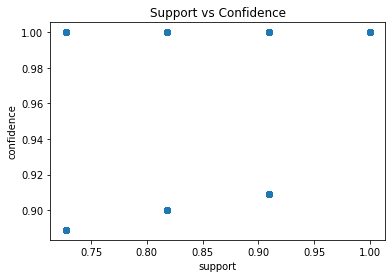

In [43]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

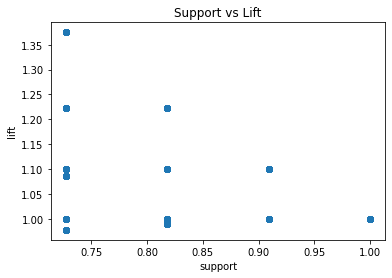

In [44]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

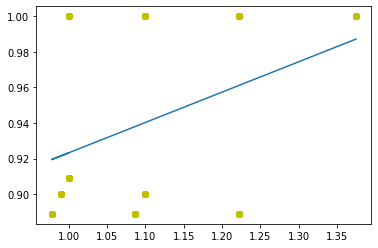

In [45]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# **Association Analysis - Non Gentrified**

In [46]:
gent_class = 'nongent'

In [47]:
df_class = df3[df3['typology'].isin(['1', '2', '3'])].drop(['typology'], axis=1)
df_class = df_class.astype(bool)

In [48]:
frequent_itemsets = fpgrowth(df_class, min_support=support_cut, use_colnames=True, verbose=1)

15 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_90)
3 itemset(s) from tree conditioned on items (aboverm_per_nonwhite_18)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_00)
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, aboverm_per_all_li_90)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, aboverm_per_nonwhite_18)
4 itemset(s) from tree conditioned on items (house_decrease)
0 itemset(s) from tree conditioned on items (house_decrease, aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (house_decrease, aboverm_per_all_li_90)
3 itemset(s) from tree conditioned on items (house_decrease, aboverm_per_nonwhite_18)
3 itemset(s) from tree conditioned on items (house_decrease, aboverm_per_all_li_00)
0 it

In [49]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)

### Non-Gentrification Calculate Rule Metrics

In [50]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [51]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_all_li_90),1.000000,0.974790,0.974790,0.974790,1.000000,0.00000,1.000000
1,(aboverm_per_all_li_90),(aboverm_per_all_li_18),0.974790,1.000000,0.974790,1.000000,1.000000,0.00000,inf
2,(aboverm_per_nonwhite_18),(aboverm_per_all_li_18),0.962185,1.000000,0.962185,1.000000,1.000000,0.00000,inf
3,(aboverm_per_all_li_18),(aboverm_per_nonwhite_18),1.000000,0.962185,0.962185,0.962185,1.000000,0.00000,1.000000
4,(aboverm_per_nonwhite_18),(aboverm_per_all_li_90),0.962185,0.974790,0.945378,0.982533,1.007943,0.00745,1.443277
5,(aboverm_per_all_li_90),(aboverm_per_nonwhite_18),0.974790,0.962185,0.945378,0.969828,1.007943,0.00745,1.253301
6,"(aboverm_per_nonwhite_18, aboverm_per_all_li_18)",(aboverm_per_all_li_90),0.962185,0.974790,0.945378,0.982533,1.007943,0.00745,1.443277
7,"(aboverm_per_nonwhite_18, aboverm_per_all_li_90)",(aboverm_per_all_li_18),0.945378,1.000000,0.945378,1.000000,1.000000,0.00000,inf
8,"(aboverm_per_all_li_18, aboverm_per_all_li_90)",(aboverm_per_nonwhite_18),0.974790,0.962185,0.945378,0.969828,1.007943,0.00745,1.253301
9,(aboverm_per_nonwhite_18),"(aboverm_per_all_li_18, aboverm_per_all_li_90)",0.962185,0.974790,0.945378,0.982533,1.007943,0.00745,1.443277


In [52]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

**Rules with high Lift and Confidence**




In [53]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [54]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_all_li_90),1.000000,0.974790,0.974790,0.974790,1.000000,0.00000,1.000000
1,(aboverm_per_all_li_90),(aboverm_per_all_li_18),0.974790,1.000000,0.974790,1.000000,1.000000,0.00000,inf
2,(aboverm_per_nonwhite_18),(aboverm_per_all_li_18),0.962185,1.000000,0.962185,1.000000,1.000000,0.00000,inf
3,(aboverm_per_all_li_18),(aboverm_per_nonwhite_18),1.000000,0.962185,0.962185,0.962185,1.000000,0.00000,1.000000
4,(aboverm_per_nonwhite_18),(aboverm_per_all_li_90),0.962185,0.974790,0.945378,0.982533,1.007943,0.00745,1.443277
5,(aboverm_per_all_li_90),(aboverm_per_nonwhite_18),0.974790,0.962185,0.945378,0.969828,1.007943,0.00745,1.253301
6,"(aboverm_per_nonwhite_18, aboverm_per_all_li_18)",(aboverm_per_all_li_90),0.962185,0.974790,0.945378,0.982533,1.007943,0.00745,1.443277
7,"(aboverm_per_nonwhite_18, aboverm_per_all_li_90)",(aboverm_per_all_li_18),0.945378,1.000000,0.945378,1.000000,1.000000,0.00000,inf
8,"(aboverm_per_all_li_18, aboverm_per_all_li_90)",(aboverm_per_nonwhite_18),0.974790,0.962185,0.945378,0.969828,1.007943,0.00745,1.253301
9,(aboverm_per_nonwhite_18),"(aboverm_per_all_li_18, aboverm_per_all_li_90)",0.962185,0.974790,0.945378,0.982533,1.007943,0.00745,1.443277


In [55]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_all_li_90),1.000000,0.974790,0.974790,0.974790,1.000000,0.000000,1.000000
1,(aboverm_per_all_li_90),(aboverm_per_all_li_18),0.974790,1.000000,0.974790,1.000000,1.000000,0.000000,inf
2,(aboverm_per_nonwhite_18),(aboverm_per_all_li_18),0.962185,1.000000,0.962185,1.000000,1.000000,0.000000,inf
3,(aboverm_per_all_li_18),(aboverm_per_nonwhite_18),1.000000,0.962185,0.962185,0.962185,1.000000,0.000000,1.000000
4,(aboverm_per_nonwhite_18),(aboverm_per_all_li_90),0.962185,0.974790,0.945378,0.982533,1.007943,0.007450,1.443277
...,...,...,...,...,...,...,...,...,...
70452,"(lmh_flag_category_aff_predominantly_LI, house...","(aboverm_per_nonwhite_18, aboverm_per_all_li_1...",0.726891,0.945378,0.701681,0.965318,1.021092,0.014494,1.574930
70453,(lmh_flag_category_aff_predominantly_LI),"(house_decrease, aboverm_per_nonwhite_18, abov...",0.777311,0.894958,0.701681,0.902703,1.008654,0.006020,1.079599
70454,"(aboverm_per_nonwhite_90, lmh_flag_category_af...",(aboverm_per_all_li_18),0.701681,1.000000,0.701681,1.000000,1.000000,0.000000,inf
70455,"(lmh_flag_category_aff_predominantly_LI, above...",(aboverm_per_nonwhite_90),0.777311,0.869748,0.701681,0.902703,1.037890,0.025616,1.338702


In [56]:
#print( (rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support']))[['antecedents', 'consequents']] )
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38440,"(aboverm_per_rent_90, low_pdmt_medhhinc_18, ab...","(aboverm_per_all_li_00, aboverm_per_rent_00)",0.781513,0.852941,0.781513,1.0,1.172414,0.114928,inf
38574,"(aboverm_per_rent_90, low_pdmt_medhhinc_18, ab...","(aboverm_per_all_li_00, aboverm_per_rent_00)",0.781513,0.852941,0.781513,1.0,1.172414,0.114928,inf
38598,"(aboverm_per_rent_90, low_pdmt_medhhinc_18, ab...","(aboverm_per_all_li_00, aboverm_per_all_li_18,...",0.781513,0.852941,0.781513,1.0,1.172414,0.114928,inf
38687,"(aboverm_per_rent_18, aboverm_per_rent_90, low...","(aboverm_per_all_li_00, aboverm_per_rent_00)",0.777311,0.852941,0.777311,1.0,1.172414,0.114310,inf
38803,"(aboverm_per_all_li_18, low_pdmt_medhhinc_18, ...","(aboverm_per_all_li_00, aboverm_per_rent_00)",0.777311,0.852941,0.777311,1.0,1.172414,0.114310,inf
...,...,...,...,...,...,...,...,...,...
69080,"(aboverm_per_all_li_00, lmh_flag_category_aff_...","(aboverm_per_all_li_18, aboverm_per_rent_00, a...",0.705882,0.861345,0.705882,1.0,1.160976,0.097874,inf
69231,"(lmh_flag_category_aff_predominantly_LI, above...","(aboverm_per_rent_00, aboverm_per_all_li_90)",0.705882,0.861345,0.705882,1.0,1.160976,0.097874,inf
69416,"(aboverm_per_all_li_18, lmh_flag_category_aff_...","(aboverm_per_rent_00, aboverm_per_all_li_90)",0.705882,0.861345,0.705882,1.0,1.160976,0.097874,inf
69448,"(lmh_flag_category_aff_predominantly_LI, above...","(aboverm_per_all_li_18, aboverm_per_rent_00, a...",0.705882,0.861345,0.705882,1.0,1.160976,0.097874,inf


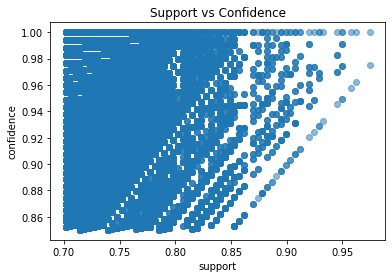

In [57]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

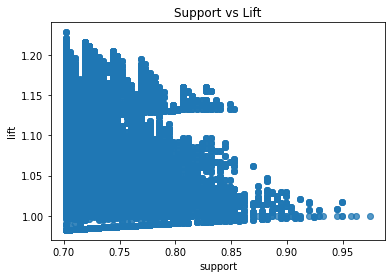

In [58]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

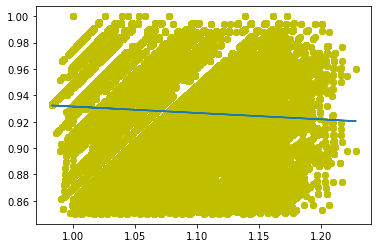

In [59]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

## Association Analysis - Stable/Exclusive

In [60]:
gent_class = 'exclusive'

In [61]:
df_class = df3[df3['typology'].isin([ '7', '8', '9'])].drop(['typology'], axis=1)
df_class = df_class.astype(bool)

In [62]:
frequent_itemsets = fpgrowth(df_class, min_support=support_cut, use_colnames=True, verbose=1)

14 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (house_decrease)
1 itemset(s) from tree conditioned on items (hotmarket_18)
1 itemset(s) from tree conditioned on items (lmh_flag_category_aff_mix_mod)
2 itemset(s) from tree conditioned on items (aboverm_real_mhval_18)
0 itemset(s) from tree conditioned on items (aboverm_real_mhval_18, house_decrease)
0 itemset(s) from tree conditioned on items (aboverm_real_mhval_18, hotmarket_18)
1 itemset(s) from tree conditioned on items (change_flag_category_ch_decrease_marginal)
2 itemset(s) from tree conditioned on items (aboverm_real_mhval_00)
0 itemset(s) from tree conditioned on items (aboverm_real_mhval_00, aboverm_real_mhval_18)
1 itemset(s) from tree conditioned on items (aboverm_real_mhval_00, house_decrease)
1 itemset(s) from tree conditioned on items (aboverm_real_mrent_12)
2 itemset(s) from tree conditioned on items (aboverm_real_mhval_90)
0 itemset(s) from tree conditioned on items (aboverm_re

In [63]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)

In [64]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [65]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(hotmarket_18),(house_decrease),0.826990,0.948097,0.775087,0.937238,0.988547,-0.008980,0.826990
1,(lmh_flag_category_aff_mix_mod),(house_decrease),0.823529,0.948097,0.782007,0.949580,1.001564,0.001221,1.029412
2,(aboverm_real_mhval_18),(house_decrease),0.792388,0.948097,0.740484,0.934498,0.985656,-0.010776,0.792388
3,(hotmarket_18),(aboverm_real_mhval_18),0.826990,0.792388,0.716263,0.866109,1.093037,0.060967,1.550606
4,(aboverm_real_mhval_18),(hotmarket_18),0.792388,0.826990,0.716263,0.903930,1.093037,0.060967,1.800881
5,(change_flag_category_ch_decrease_marginal),(house_decrease),0.792388,0.948097,0.768166,0.969432,1.022503,0.016906,1.697973
6,(aboverm_real_mhval_00),(aboverm_real_mhval_18),0.782007,0.792388,0.747405,0.955752,1.206168,0.127752,4.692042
7,(aboverm_real_mhval_18),(aboverm_real_mhval_00),0.792388,0.782007,0.747405,0.943231,1.206168,0.127752,3.840032
8,(aboverm_real_mhval_00),(house_decrease),0.782007,0.948097,0.743945,0.951327,1.003407,0.002526,1.066373
9,"(aboverm_real_mhval_00, house_decrease)",(aboverm_real_mhval_18),0.743945,0.792388,0.709343,0.953488,1.203311,0.119850,4.463668


In [66]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

In [67]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [68]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(hotmarket_18),(house_decrease),0.826990,0.948097,0.775087,0.937238,0.988547,-0.008980,0.826990
1,(lmh_flag_category_aff_mix_mod),(house_decrease),0.823529,0.948097,0.782007,0.949580,1.001564,0.001221,1.029412
2,(aboverm_real_mhval_18),(house_decrease),0.792388,0.948097,0.740484,0.934498,0.985656,-0.010776,0.792388
3,(hotmarket_18),(aboverm_real_mhval_18),0.826990,0.792388,0.716263,0.866109,1.093037,0.060967,1.550606
4,(aboverm_real_mhval_18),(hotmarket_18),0.792388,0.826990,0.716263,0.903930,1.093037,0.060967,1.800881
5,(change_flag_category_ch_decrease_marginal),(house_decrease),0.792388,0.948097,0.768166,0.969432,1.022503,0.016906,1.697973
6,(aboverm_real_mhval_00),(aboverm_real_mhval_18),0.782007,0.792388,0.747405,0.955752,1.206168,0.127752,4.692042
7,(aboverm_real_mhval_18),(aboverm_real_mhval_00),0.792388,0.782007,0.747405,0.943231,1.206168,0.127752,3.840032
8,(aboverm_real_mhval_00),(house_decrease),0.782007,0.948097,0.743945,0.951327,1.003407,0.002526,1.066373
9,"(aboverm_real_mhval_00, house_decrease)",(aboverm_real_mhval_18),0.743945,0.792388,0.709343,0.953488,1.203311,0.119850,4.463668


In [69]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(lmh_flag_category_aff_mix_mod),(house_decrease),0.823529,0.948097,0.782007,0.949580,1.001564,0.001221,1.029412
3,(hotmarket_18),(aboverm_real_mhval_18),0.826990,0.792388,0.716263,0.866109,1.093037,0.060967,1.550606
4,(aboverm_real_mhval_18),(hotmarket_18),0.792388,0.826990,0.716263,0.903930,1.093037,0.060967,1.800881
5,(change_flag_category_ch_decrease_marginal),(house_decrease),0.792388,0.948097,0.768166,0.969432,1.022503,0.016906,1.697973
6,(aboverm_real_mhval_00),(aboverm_real_mhval_18),0.782007,0.792388,0.747405,0.955752,1.206168,0.127752,4.692042
7,(aboverm_real_mhval_18),(aboverm_real_mhval_00),0.792388,0.782007,0.747405,0.943231,1.206168,0.127752,3.840032
8,(aboverm_real_mhval_00),(house_decrease),0.782007,0.948097,0.743945,0.951327,1.003407,0.002526,1.066373
9,"(aboverm_real_mhval_00, house_decrease)",(aboverm_real_mhval_18),0.743945,0.792388,0.709343,0.953488,1.203311,0.119850,4.463668
10,"(aboverm_real_mhval_00, aboverm_real_mhval_18)",(house_decrease),0.747405,0.948097,0.709343,0.949074,1.001031,0.000730,1.019188
11,"(house_decrease, aboverm_real_mhval_18)",(aboverm_real_mhval_00),0.740484,0.782007,0.709343,0.957944,1.224981,0.130279,5.183391


In [70]:
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,"(house_decrease, aboverm_real_mhval_18)",(aboverm_real_mhval_00),0.740484,0.782007,0.709343,0.957944,1.224981,0.130279,5.183391
6,(aboverm_real_mhval_00),(aboverm_real_mhval_18),0.782007,0.792388,0.747405,0.955752,1.206168,0.127752,4.692042
9,"(aboverm_real_mhval_00, house_decrease)",(aboverm_real_mhval_18),0.743945,0.792388,0.709343,0.953488,1.203311,0.119850,4.463668
7,(aboverm_real_mhval_18),(aboverm_real_mhval_00),0.792388,0.782007,0.747405,0.943231,1.206168,0.127752,3.840032
25,(aboverm_per_col_90),(aboverm_per_col_00),0.761246,0.761246,0.709343,0.931818,1.224070,0.129848,3.501730
24,(aboverm_per_col_00),(aboverm_per_col_90),0.761246,0.761246,0.709343,0.931818,1.224070,0.129848,3.501730
21,(aboverm_per_col_00),(aboverm_per_col_18),0.761246,0.761246,0.705882,0.927273,1.218099,0.126387,3.282872
22,(aboverm_per_col_18),(aboverm_per_col_00),0.761246,0.761246,0.705882,0.927273,1.218099,0.126387,3.282872
12,(aboverm_real_mhval_00),"(house_decrease, aboverm_real_mhval_18)",0.782007,0.740484,0.709343,0.907080,1.224981,0.130279,2.792882
17,(aboverm_real_mhval_90),(aboverm_real_mhval_00),0.778547,0.782007,0.716263,0.920000,1.176460,0.107434,2.724913
